In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from DA import Import

# Import data

- snelheid is in knopen -> 1 knoop = 1,852 km/h

In [137]:
n = 25
a = 3
alpha = 0.05

In [138]:
df = pd.read_excel("data_raket.xlsx")

In [139]:
df = df.rename(columns={"test":"test", "doel snelheid (in knopen)":"snelheid", "resultaat (0=mis 1=raak)":"resultaat"})

In [140]:
df

,test,snelheid,resultaat
0,1,400,0
1,2,220,1
2,3,490,0
3,4,210,1
4,5,500,0
5,6,270,0
6,7,200,1
7,8,470,0
8,9,480,0
9,10,310,1


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   test       25 non-null     int64
 1   snelheid   25 non-null     int64
 2   resultaat  25 non-null     int64
dtypes: int64(3)
memory usage: 728.0 bytes


<AxesSubplot: ylabel='Frequency'>

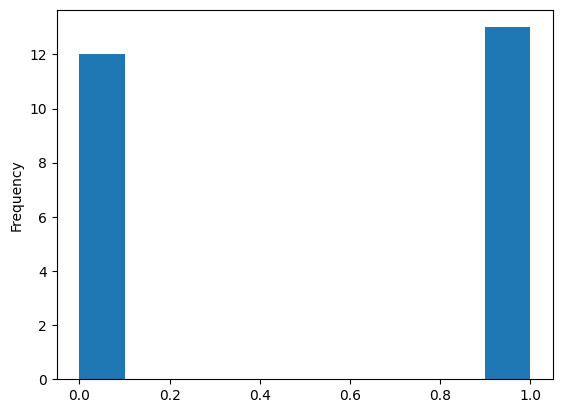

In [142]:
df.resultaat.plot(kind='hist')

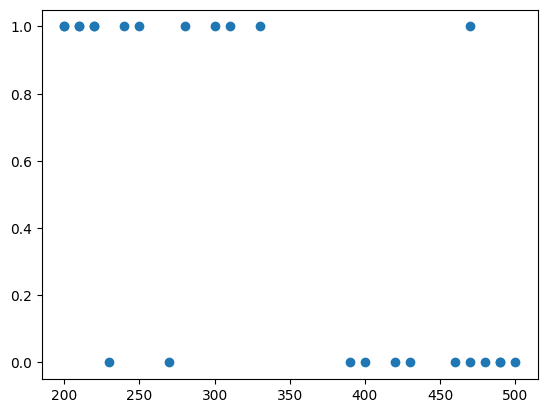

In [143]:
plt.scatter(df.snelheid, df.resultaat)

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [145]:
mu = df.snelheid.mean()
std = df.snelheid.std()
f = 1/(1+np.exp((df.snelheid-mu)/std))

In [146]:
X = df.snelheid.values
type(X)
X=X.reshape(-1,1)
model = LogisticRegression(random_state=1).fit(X, df.resultaat.values.tolist())
model.score(X, df.resultaat.values.tolist())

0.88

In [147]:
X_f = np.linspace(df.snelheid.min(), df.snelheid.max(), 1000)
x_f1 = x_f.reshape(-1,1)
y = model.predict_proba(x_f1)
pred = model.predict(X)
metrics.roc_auc_score(df.resultaat.values, model.predict_proba(X)[:,1])

0.8878205128205129

In [148]:
y

array([[0.07379145, 0.92620855],
       [0.07415564, 0.92584436],
       [0.07452148, 0.92547852],
       ...,
       [0.94107313, 0.05892687],
       [0.94136726, 0.05863274],
       [0.94166002, 0.05833998]])

In [149]:
y[:,1]

array([0.92620855, 0.92584436, 0.92547852, 0.92511102, 0.92474185,
       0.92437102, 0.9239985 , 0.9236243 , 0.92324842, 0.92287084,
       0.92249155, 0.92211056, 0.92172786, 0.92134343, 0.92095728,
       0.92056939, 0.92017977, 0.91978841, 0.91939529, 0.91900041,
       0.91860377, 0.91820537, 0.91780518, 0.91740322, 0.91699947,
       0.91659392, 0.91618657, 0.91577742, 0.91536645, 0.91495367,
       0.91453905, 0.91412261, 0.91370433, 0.91328421, 0.91286223,
       0.9124384 , 0.91201271, 0.91158514, 0.9111557 , 0.91072438,
       0.91029118, 0.90985607, 0.90941907, 0.90898016, 0.90853934,
       0.9080966 , 0.90765193, 0.90720534, 0.9067568 , 0.90630632,
       0.90585389, 0.9053995 , 0.90494315, 0.90448483, 0.90402454,
       0.90356226, 0.903098  , 0.90263174, 0.90216348, 0.90169322,
       0.90122094, 0.90074664, 0.90027032, 0.89979196, 0.89931157,
       0.89882914, 0.89834465, 0.89785811, 0.8973695 , 0.89687883,
       0.89638608, 0.89589125, 0.89539433, 0.89489532, 0.89439

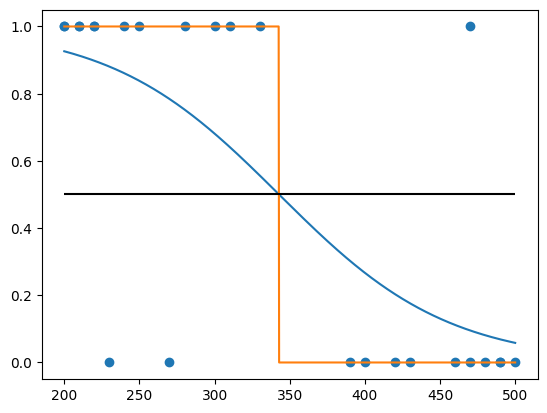

In [150]:
plt.scatter(df.snelheid, df.resultaat)
plt.plot(x_f, y[:,1])
plt.plot(x_f, model.predict(x_f1))
plt.hlines(xmin = 200, xmax=500, y=0.5, color='k')

# Validatie

## Onze validatiemethode is ome Jo